# Introduction


**What?** Save gif image of the iterations history



# Import modules

In [6]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio


# Approximating a quadratic function

In [25]:
torch.manual_seed(1)

# x data (tensor), shape=(100, 1)
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  
# noisy y data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())

In [27]:
print(type(x))
# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)
print(type(x))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [28]:
# This is one way to define a network, but other are available
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [36]:
# Initialise the model
net = Net(n_feature=1, n_hidden=10, n_output=1)
print(net)
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss


Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [31]:
# Train the network
for t in range(200):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    # Clear gradients for next train
    optimizer.zero_grad()   
    # Backpropagation, compute gradients
    loss.backward()         
    # Apply gradients
    optimizer.step()        

In [34]:
print("Final loss", loss.data.numpy())
print("Total number of iterations: ", t + 1)

Final loss 0.0050118268
Total number of iterations:  200


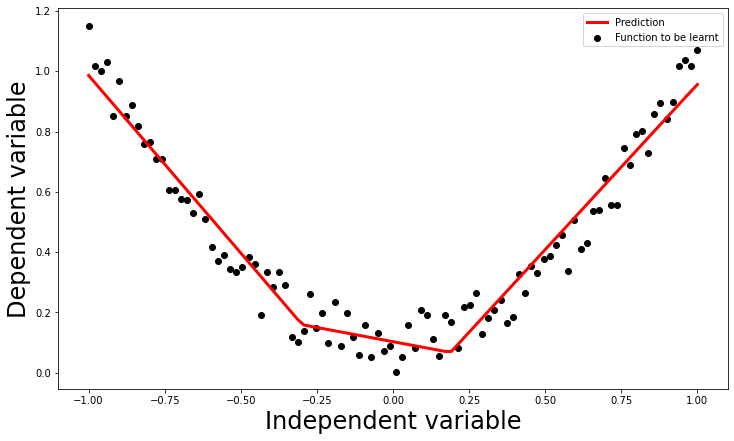

In [35]:
# Plot the results
fig, ax = plt.subplots(figsize=(12,7))
ax.set_xlabel('Independent variable', fontsize=24)
ax.set_ylabel('Dependent variable', fontsize=24)

ax.scatter(x.data.numpy(), y.data.numpy(), color = "k", label = "Function to be learnt")
ax.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw = 3, label = "Prediction")
plt.legend()
plt.show()


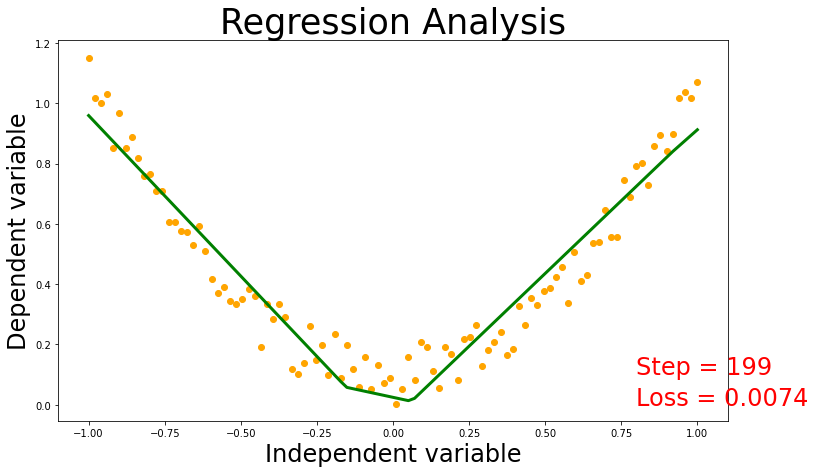

In [9]:


torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)


# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
# print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

my_images = []
fig, ax = plt.subplots(figsize=(12,7))

# train the network
for t in range(200):
  
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    # plot and show learning process
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=35)
    ax.set_xlabel('Independent variable', fontsize=24)
    ax.set_ylabel('Dependent variable', fontsize=24)
    ax.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
    ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
    ax.text(0.8, 0.1, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
    ax.text(0.8, 0, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 24, 'color':  'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)
    
# save images as a gif    
imageio.mimsave('./animated_training_history.gif', my_images, fps=10)



# Loading into the i-python notebook


- Assuming the file was dumped locally.
- In a markdown cell use this command `![SegmentLocal](./animated_training_history.gif "segment")`



![SegmentLocal](./animated_training_history.gif "segment")

# References


- https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379
- [How to load gif images in an i-python notebook](https://stackoverflow.com/questions/51527868/how-do-i-embed-a-gif-in-jupyter-notebook) 



# Conclusions


- NNs are power funciton estimators. The most stricking thing is that you can keep adding layers and it will eventually starts work. This by no means is an efficient process from a computational stand point but it saves man hours.
- PyTorch offers two ways to build a model.

